Accuracy of Spectral Clustering before PCA: 0.0%
Accuracy of Spectral Clustering after PCA: 0.0%


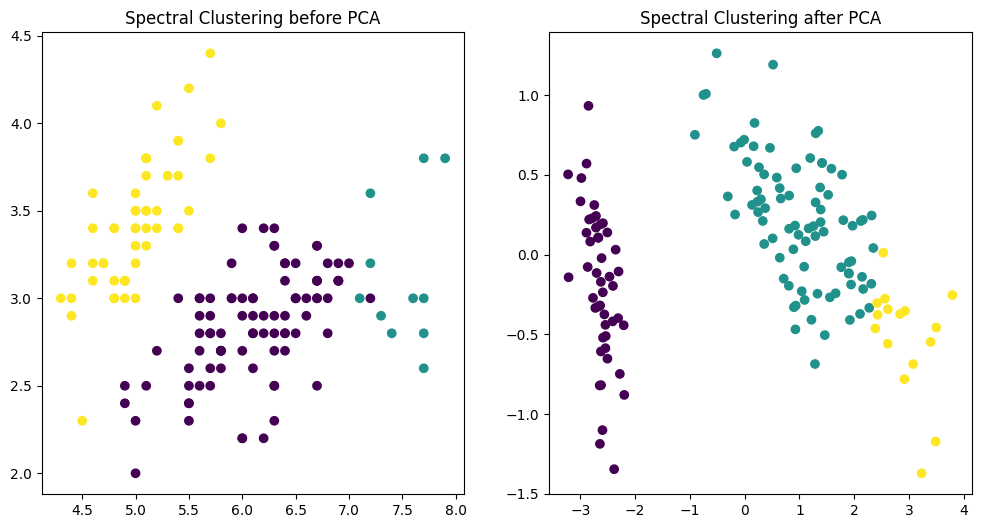

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Load data from iris_data.txt
with open("iris_data.txt", "r") as file:
    lines = file.readlines()

# Extract features and ground truth labels
X = []
ground_truth_labels = []
for line in lines:
    parts = line.strip().split(",")
    features = [float(x) for x in parts[:4]]
    label = parts[4]
    X.append(features)
    ground_truth_labels.append(label)

X = np.array(X)
ground_truth_labels = np.array(ground_truth_labels)

def spectral_clustering(X, n_clusters):
    # Step 1: Compute the similarity matrix
    W = np.exp(-np.sum((X[:, None] - X[None]) ** 2, axis=-1) / 2)

    # Step 2: Compute the Degree matrix
    D = np.diag(W.sum(axis=1))

    # Step 3: Compute the Laplacian matrix
    L = D - W

    # Step 4: Compute the eigenvalues and eigenvectors of L
    eigenvalues, eigenvectors = np.linalg.eig(L)

    # Step 5: Select the k eigenvectors corresponding to the k smallest eigenvalues
    indices = np.argsort(eigenvalues)[:n_clusters]
    U = eigenvectors[:, indices]

    # Step 6: Normalize the row of U
    U = U / np.sqrt((U ** 2).sum(axis=1, keepdims=True))

    # Step 7: Apply KMeans on the row of U
    # Here we use a simple implementation of KMeans using numpy
    centroids = U[np.random.choice(len(U), n_clusters, replace=False)]
    for _ in range(10):  # 10 iterations of KMeans
        labels = ((U[:, None] - centroids[None]) ** 2).sum(axis=-1).argmin(axis=-1)
        for i in range(n_clusters):
            centroids[i] = U[labels == i].mean(axis=0)

    return labels


def calculate_accuracy(predicted_labels, ground_truth_labels):
    # Ensure the labels are numpy arrays
    predicted_labels = np.array(predicted_labels)
    ground_truth_labels = np.array(ground_truth_labels)

    # Calculate the accuracy
    accuracy = np.sum(predicted_labels == ground_truth_labels) / len(ground_truth_labels)

    return accuracy

# Function to implement PCA
def pca(X, k):
    # Center the data
    X_centered = X - np.mean(X, axis=0)

    # Compute the covariance matrix
    covariance_matrix = np.cov(X_centered.T)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort eigenvalues and eigenvectors
    indices = np.argsort(eigenvalues)[::-1]
    top_k_indices = indices[:k]

    # Project data onto the top k eigenvectors
    components = eigenvectors[:, top_k_indices]

    # Project the data
    projected_data = np.dot(X_centered, components)

    return projected_data

# Apply PCA
X_pca = pca(X, 2)

# Apply Spectral Clustering before PCA
labels_before_pca = spectral_clustering(X, n_clusters=3)

# Calculate accuracy before PCA
accuracy_before_pca = calculate_accuracy(labels_before_pca, ground_truth_labels)
print(f"Accuracy of Spectral Clustering before PCA: {accuracy_before_pca * 100}%")

# Apply Spectral Clustering after PCA
labels_after_pca = spectral_clustering(X_pca, n_clusters=3)

# Calculate accuracy after PCA
accuracy_after_pca = calculate_accuracy(labels_after_pca, ground_truth_labels)
print(f"Accuracy of Spectral Clustering after PCA: {accuracy_after_pca * 100}%")

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_before_pca)
plt.title('Spectral Clustering before PCA')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_after_pca)
plt.title('Spectral Clustering after PCA')

plt.show()


Accuracy of Spectral Clustering before PCA: 0.0%
Accuracy of Spectral Clustering after PCA: 0.0%


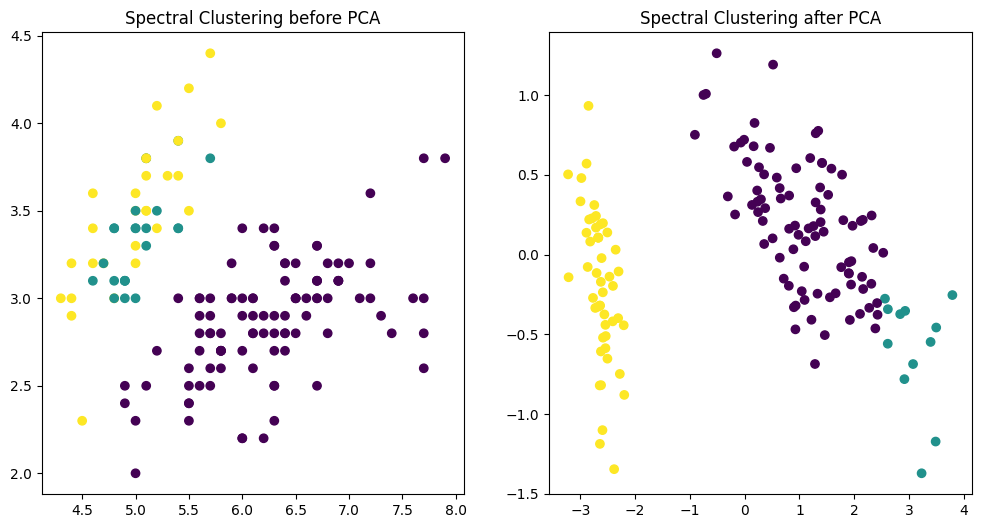

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Read data from the provided URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = urllib.request.urlopen(url)
data = response.read().decode("utf-8")

# Split the data into lines
lines = data.strip().split("\n")

# Extract features and ground truth labels
X = []
ground_truth_labels = []
for line in lines:
    parts = line.strip().split(",")
    features = [float(x) for x in parts[:4]]
    label = parts[4]
    X.append(features)
    ground_truth_labels.append(label)

X = np.array(X)
ground_truth_labels = np.array(ground_truth_labels)

def spectral_clustering(X, n_clusters):
    # Step 1: Compute the similarity matrix
    W = np.exp(-np.sum((X[:, None] - X[None]) ** 2, axis=-1) / 2)

    # Step 2: Compute the Degree matrix
    D = np.diag(W.sum(axis=1))

    # Step 3: Compute the Laplacian matrix
    L = D - W

    # Step 4: Compute the eigenvalues and eigenvectors of L
    eigenvalues, eigenvectors = np.linalg.eig(L)

    # Step 5: Select the k eigenvectors corresponding to the k smallest eigenvalues
    indices = np.argsort(eigenvalues)[:n_clusters]
    U = eigenvectors[:, indices]

    # Step 6: Normalize the row of U
    U = U / np.sqrt((U ** 2).sum(axis=1, keepdims=True))

    # Step 7: Apply KMeans on the row of U
    # Here we use a simple implementation of KMeans using numpy
    centroids = U[np.random.choice(len(U), n_clusters, replace=False)]
    for _ in range(10):  # 10 iterations of KMeans
        labels = ((U[:, None] - centroids[None]) ** 2).sum(axis=-1).argmin(axis=-1)
        for i in range(n_clusters):
            centroids[i] = U[labels == i].mean(axis=0)

    return labels


def calculate_accuracy(predicted_labels, ground_truth_labels):
    # Ensure the labels are numpy arrays
    predicted_labels = np.array(predicted_labels)
    ground_truth_labels = np.array(ground_truth_labels)

    # Calculate the accuracy
    accuracy = np.sum(predicted_labels == ground_truth_labels) / len(ground_truth_labels)

    return accuracy

# Function to implement PCA
def pca(X, k):
    # Center the data
    X_centered = X - np.mean(X, axis=0)

    # Compute the covariance matrix
    covariance_matrix = np.cov(X_centered.T)

    # Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

    # Sort eigenvalues and eigenvectors
    indices = np.argsort(eigenvalues)[::-1]
    top_k_indices = indices[:k]

    # Project data onto the top k eigenvectors
    components = eigenvectors[:, top_k_indices]

    # Project the data
    projected_data = np.dot(X_centered, components)

    return projected_data

# Apply PCA
X_pca = pca(X, 2)

# Apply Spectral Clustering before PCA
labels_before_pca = spectral_clustering(X, n_clusters=3)

# Calculate accuracy before PCA
accuracy_before_pca = calculate_accuracy(labels_before_pca, ground_truth_labels)
print(f"Accuracy of Spectral Clustering before PCA: {accuracy_before_pca * 100}%")

# Apply Spectral Clustering after PCA
labels_after_pca = spectral_clustering(X_pca, n_clusters=3)

# Calculate accuracy after PCA
accuracy_after_pca = calculate_accuracy(labels_after_pca, ground_truth_labels)
print(f"Accuracy of Spectral Clustering after PCA: {accuracy_after_pca * 100}%")

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=labels_before_pca)
plt.title('Spectral Clustering before PCA')

plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_after_pca)
plt.title('Spectral Clustering after PCA')

plt.show()


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Read data from the provided URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
response = urllib.request.urlopen(url)
data = response.read().decode("utf-8")

# Split the data into lines
lines = data.strip().split("\n")

# Extract features and ground truth labels
X = []
ground_truth_labels = []
for line in lines:
    parts = line.strip().split(",")
    features = [float(x) for x in parts[:4]]
    label = parts[4]
    X.append(features)
    ground_truth_labels.append(label)

X = np.array(X)
ground_truth_labels = np.array(ground_truth_labels)

def spectral_clustering(X, n_clusters):
    # Step 1: Normalize the data
    scaler = StandardScaler()
    X_normalized = scaler.fit_transform(X)

    # Step 2: Compute the similarity matrix
    W = np.exp(-np.sum((X_normalized[:, None] - X_normalized[None]) ** 2, axis=-1) / 2)

    # Step 3: Compute the Degree matrix
    D = np.diag(W.sum(axis=1))

    # Step 4: Compute the Laplacian matrix
    L = D - W

    # Step 5: Compute the eigenvalues and eigenvectors of L
    eigenvalues, eigenvectors = np.linalg.eig(L)

    # Step 6: Select the k eigenvectors corresponding to the k smallest eigenvalues
    indices = np.argsort(eigenvalues)[:n_clusters]
    U = eigenvectors[:, indices]

    # Step 7: Normalize the rows of U
    U_normalized = U / np.sqrt((U ** 2).sum(axis=1, keepdims=True) + np.finfo(float).eps)

    # Step 8: Apply KMeans on the rows of U
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(U_normalized)

    return labels + 1  # Return labels starting from 1

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply Spectral Clustering before PCA
labels_before_pca = spectral_clustering(X, n_clusters=3)

# Apply Spectral Clustering after PCA
labels_after_pca = spectral_clustering(X_pca, n_clusters=3)

# Plot the results
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for label in np.unique(labels_before_pca):
    plt.scatter(X[:, 0][labels_before_pca == label], X[:, 1][labels_before_pca == label], label=f'Cluster {label}')
plt.title('Spectral Clustering before PCA')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
for label in np.unique(labels_after_pca):
    plt.scatter(X_pca[:, 0][labels_after_pca == label], X_pca[:, 1][labels_after_pca == label], label=f'Cluster {label}')
plt.title('Spectral Clustering after PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()


ModuleNotFoundError: No module named 'sklearn'